In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Select digit-5 (positive class) and digit-3 (negative class)
digit_5_idx = np.where(y == 5)[0]
digit_3_idx = np.where(y == 3)[0]

# Combine positive and negative class data
X_data = np.concatenate((X[digit_5_idx[:10000]], X[digit_3_idx[:10000]]), axis=0)
y_data = np.concatenate((np.ones(10000), -np.ones(10000)))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Train Perceptron model
clf = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True)
clf.fit(X_train, y_train)

# Evaluate on test set
accuracy = clf.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

KeyError: "None of [Index([    0,    11,    35,    47,    65,   100,   132,   138,   145,   173,\n       ...\n       69853, 69870, 69877, 69883, 69907, 69941, 69970, 69982, 69988, 69998],\n      dtype='int64', length=6313)] are in the [columns]"

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Select digit-5 (positive class) and digit-3 (negative class)
digit_5_idx = np.where(y == 5)[0]
digit_3_idx = np.where(y == 3)[0]

# Ensure we have enough data for both classes
min_samples = min(len(digit_5_idx), len(digit_3_idx))
digit_5_idx = digit_5_idx[:min_samples]
digit_3_idx = digit_3_idx[:min_samples]

# Combine positive and negative class data
X_data = np.concatenate((X[digit_5_idx], X[digit_3_idx]), axis=0)
y_data = np.concatenate((np.ones(min_samples), -np.ones(min_samples)))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Train Perceptron model
clf = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True)
clf.fit(X_train, y_train)

# Evaluate on test set
accuracy = clf.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

KeyError: "None of [Index([    0,    11,    35,    47,    65,   100,   132,   138,   145,   173,\n       ...\n       69853, 69870, 69877, 69883, 69907, 69941, 69970, 69982, 69988, 69998],\n      dtype='int64', length=6313)] are in the [columns]"

In [3]:
import numpy as np

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target'].astype(int)

In [5]:
X_train, y_train = X[:10000], y[:10000]
X_test, y_test = X[10000:12000], y[10000:12000]


In [ ]:
# Training set
X_train_5 = X_train[y_train == 5]
X_train_3 = X_train[y_train == 3]
X_train_final = np.vstack((X_train_5, X_train_3))

y_train_5 = np.ones(X_train_5.shape[0])
y_train_3 = -np.ones(X_train_3.shape[0])
y_train_final = np.hstack((y_train_5, y_train_3))

# Testing set
X_test_5 = X_test[y_test == 5]
X_test_3 = X_test[y_test == 3]
X_test_final = np.vstack((X_test_5, X_test_3))

y_test_5 = np.ones(X_test_5.shape[0])
y_test_3 = -np.ones(X_test_3.shape[0])
y_test_final = np.hstack((y_test_5, y_test_3))


In [10]:
num_samples_5 = X_train_5.shape[0]
num_samples_3 = X_train_3.shape[0]
(num_samples_5, num_samples_3)

(863, 1032)

In [22]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=100, eta0=1, random_state=42, shuffle=False, fit_intercept=True)
perceptron.fit(X_train_final, y_train_final)


Perceptron(eta0=1, max_iter=100, random_state=42, shuffle=False)

In [23]:
y_pred = perceptron.predict(X_test_final)


In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_final, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 54.86%


In [25]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_final, y_pred)

# Extract True Positives (TP) from the confusion matrix
true_positives = cm[1, 1]

print(f"Confusion Matrix:\n{cm}")
print(f"True Positives: {true_positives}")

Confusion Matrix:
[[196   0]
 [172  13]]
True Positives: 13


In [26]:
recall = true_positives / num_samples_5
print(f"Recall: {recall:.2f}")
precision = true_positives / (true_positives + cm[1, 0])
print(f"Precision: {precision:.2f}")

Recall: 0.02
Precision: 0.07


In [1]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier(max_iter=100, eta0=1, random_state=42, shuffle=False, fit_intercept=True)

In [6]:
from sklearn.utils import shuffle

# Collect all digit-6 (Positive class) and digit-9 (Negative class) images from x_train
X_train_6 = X_train[y_train == 6]
X_train_9 = X_train[y_train == 9]

# Stack them properly as a single datamatrix x_train_69
X_train_69 = np.vstack((X_train_6, X_train_9))

# Collect the respective labels and store it in a variable y_train_69
y_train_69 = np.hstack((np.ones(X_train_6.shape[0]), np.zeros(X_train_9.shape[0])))

# Shuffle the datamatrix and labels
X_train_69, y_train_69 = shuffle(X_train_69, y_train_69, random_state=1729)

# Collect all digit-6 (Positive class) and digit-9 (Negative class) images from x_test
X_test_6 = X_test[y_test == 6]
X_test_9 = X_test[y_test == 9]

# Stack them properly as a single datamatrix x_test_69
X_test_69 = np.vstack((X_test_6, X_test_9))

# Collect the respective labels and store it in a variable y_test_69
y_test_69 = np.hstack((np.ones(X_test_6.shape[0]), np.zeros(X_test_9.shape[0])))

# Shuffle the datamatrix and labels
X_test_69, y_test_69 = shuffle(X_test_69, y_test_69, random_state=1729)

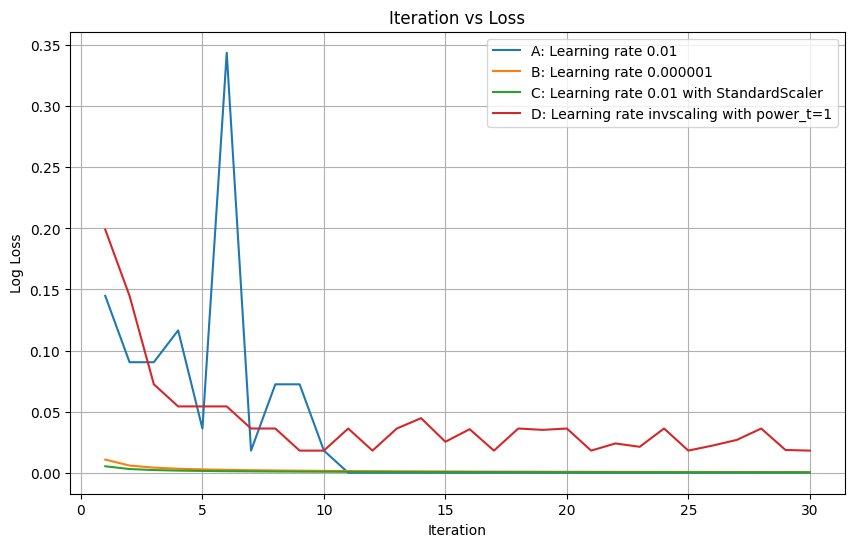

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

# Function to train the model and capture loss for each iteration
def train_and_capture_loss(X_train, y_train, learning_rate, eta0, max_iter, scaling=False, invscaling=False):
    if scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
    
    clf = SGDClassifier(loss='log_loss', penalty=None, learning_rate=learning_rate, eta0=eta0, max_iter=1, random_state=10, warm_start=True)
    losses = []
    
    for _ in range(max_iter):
        clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
        # Get the predictions (probabilities)
        y_pred_proba = clf.predict_proba(X_train)
        # Compute the actual log loss using sklearn's log_loss function
        loss = log_loss(y_train, y_pred_proba)
        losses.append(loss)
    
    return losses

# Settings
max_iter = 30

# A. Learning rate: 0.01
losses_A = train_and_capture_loss(X_train_69, y_train_69, learning_rate='constant', eta0=0.01, max_iter=max_iter)

# B. Learning rate: 0.000001
losses_B = train_and_capture_loss(X_train_69, y_train_69, learning_rate='constant', eta0=0.000001, max_iter=max_iter)

# C. Learning rate: 0.01 with StandardScaler
losses_C = train_and_capture_loss(X_train_69, y_train_69, learning_rate='constant', eta0=0.01, max_iter=max_iter, scaling=True)

# D. Learning rate: invscaling with power_t=1
losses_D = train_and_capture_loss(X_train_69, y_train_69, learning_rate='invscaling', eta0=0.01, max_iter=max_iter)

# Plotting the iteration vs loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iter + 1), losses_A, label='A: Learning rate 0.01')
plt.plot(range(1, max_iter + 1), losses_B, label='B: Learning rate 0.000001')
plt.plot(range(1, max_iter + 1), losses_C, label='C: Learning rate 0.01 with StandardScaler')
plt.plot(range(1, max_iter + 1), losses_D, label='D: Learning rate invscaling with power_t=1')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Iteration vs Loss')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

# Create the classifier with the specified settings
sgd_classifier = SGDClassifier(
    loss='log_loss', 
    penalty=None, 
    eta0=0.5, 
    learning_rate='invscaling', 
    power_t=0.5, 
    max_iter=10, 
    shuffle=True, 
    random_state=10
)

# Train the classifier with X_train_69 and y_train_69
sgd_classifier.fit(X_train_69, y_train_69)

# Make predictions on the training samples
y_train_pred = sgd_classifier.predict(X_train_69)

# Compute the confusion matrix
cm_train = confusion_matrix(y_train_69, y_train_pred)

# Extract False Positives (FP) from the confusion matrix
false_positives = cm_train[0, 1]

print(f"False Positives (FP) in training samples: {false_positives}")

False Positives (FP) in training samples: 1


c:\Users\vvagh\miniconda3\envs\stenv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


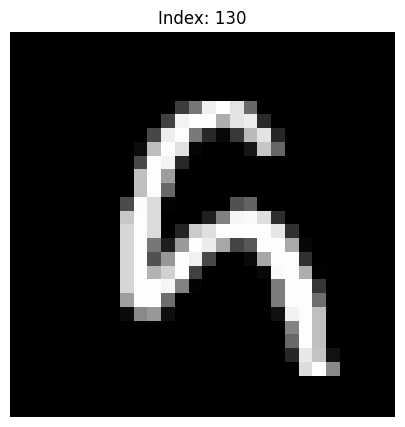

The first index of False Positive samples is: 130


In [10]:
import matplotlib.pyplot as plt

# Get the indices of False Positive samples
fp_indices = np.where((y_train_69 == 0) & (y_train_pred == 1))[0]

# Display the first False Positive sample
first_fp_index = fp_indices[0]

# Plot all False Positive samples
fig, axes = plt.subplots(1, len(fp_indices), figsize=(15, 5))
if len(fp_indices) == 1:
    axes.imshow(X_train_69[fp_indices[0]].reshape(28, 28), cmap='gray')
    axes.axis('off')
    axes.set_title(f'Index: {fp_indices[0]}')
else:
    for i, idx in enumerate(fp_indices):
        axes[i].imshow(X_train_69[idx].reshape(28, 28), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Index: {idx}')

plt.show()

# Print the first index of False Positive samples
print(f"The first index of False Positive samples is: {first_fp_index}")

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Fetch the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='train')
X, y = newsgroups.data, newsgroups.target

# Convert text data to feature vectors
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_vectorized, y, test_size=0.3, random_state=0)

# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train, y_train)

# Compute the score on the validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.2f}")